In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys

import numpy as np

from astropy.cosmology import Planck18
import py21cmfast as p21c

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
from dm21cm.dm_params import DMParams
from dm21cm.evolve import evolve

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [6]:
run_name = 'phph_new'

os.environ['DM21CM_DATA_DIR'] = '/n/holyscratch01/iaifi_lab/yitians/dm21cm/DM21cm/data/tf/zf01/data'

#===== global params =====
p21c.global_params.CLUMPING_FACTOR = 1.
#p21c.global_params.Pop2_ion = 0.

return_dict = evolve(
    run_name = run_name,
    z_start = 45.,
    z_end = 5.,
    dm_params = DMParams(
        mode='decay',
        primary='phot_delta',
        m_DM=1e8, # [eV]
        lifetime=1e25, # [s]
    ),
    enable_elec = False,
    
    p21c_initial_conditions = p21c.initial_conditions(
        user_params = p21c.UserParams(
            HII_DIM = 32,
            BOX_LEN = 32 * 2, # [conformal Mpc]
            N_THREADS = 32,
        ),
        cosmo_params = p21c.CosmoParams(
            OMm = Planck18.Om0,
            OMb = Planck18.Ob0,
            POWER_INDEX = Planck18.meta['n'],
            SIGMA_8 = Planck18.meta['sigma8'],
            hlittle = Planck18.h,
        ),
        random_seed = 54321,
        write = True,
    ),
    p21c_astro_params = p21c.AstroParams(L_X = 0.), # log10 value

    clear_cache = True,
    #debug_flags = ['xraycheck'],
    #tf_on_device = False,
)

np.save(f'{run_name}_records.npy', return_dict['records'])

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/inputs.py:487: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
INFO:root:Using 21cmFAST version 0.1.dev1586+g60df221.d20231025
INFO:root:Cache dir: /n/holyscratch01/iaifi_lab/yitians/21cmFAST-cache/phph_new
INFO:root:TransferFunctionWrapper: Loaded photon transfer functions.
INFO:root:TransferFunctionWrapper: Skipping electron transfer functions.
INFO:root:DarkHistoryWrapper: Running DarkHistory to generate initial conditions...


****** Loading transfer functions... ******
Using data at /n/holyscratch01/iaifi_lab/yitians/darkhistory/DHdata_v1_1
    for propagating photons...   Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******
****** Loading transfer functions... ******
    for inverse Compton (Thomson)...  Done!
    for inverse Compton (relativistic)...  Done!
    for inverse Compton (energy loss)...  Done!
****** Loading complete! ******
Loading time: 31.655 s


  0%|          | 2/430 [00:00<00:29, 14.43it/s]

Initialization time: 0.021 s


100%|██████████| 430/430 [00:51<00:00,  8.36it/s]
INFO:root:DarkHistoryWrapper: Saved DarkHistory initial conditions.


Main loop time: 51.421 s


100%|██████████| 204/204 [02:06<00:00,  1.61it/s]

xray: 0.0507 +/- 0.0130 s
bath+dm: 0.0561 +/- 0.0004 s
21cmFAST: 0.4819 +/- 0.0567 s
prep_next: 0.0289 +/- 0.0128 s


In [3]:
r_new = np.load(f'../outputs/dm21cm-check/xray_new_records.npy', allow_pickle=True).item()

[]

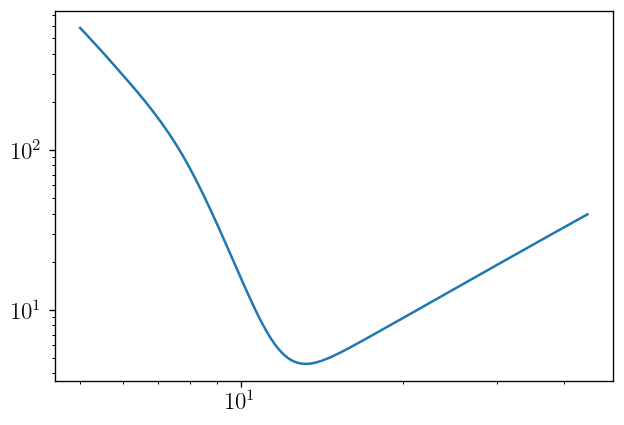

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
ax = axs[0]
ax.plot(r_new['z'], r_new['T_k'])
ax.plot(r_old['z'], r_old['T_k'], '--')
ax.loglog()

ax = axs[1]
ax.plot(r_new['z'], r_new['x_e'])
ax.plot(r_old['z'], r_old['x_e'], '--')
ax.loglog()